In [1]:
import tensorflow as tf
print(tf.keras.__version__)
print(tf.__version__)

3.8.0
2.18.0


In [2]:
#Connect the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1: Data Presentation

### Loading the Data

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


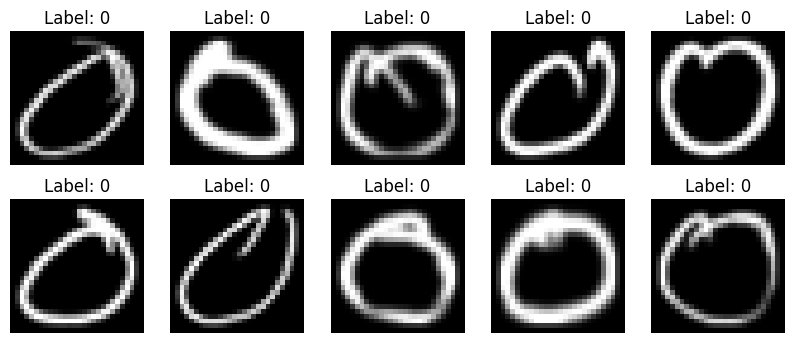

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image #Import Pillow
#Define dataset paths
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning./week4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning./week4/DevanagariHandwrittenDigitDataset/Test"
#Define image size
img_height, img_width = 28,28
#Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names =sorted(os.listdir(folder)) #sorted class names (digit_0,digit_1)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

## Task 2: Build the FCN Model

In [4]:
# import the tensorflow library
from tensorflow import keras

# Build the Fully Connected Neural Network model
model = keras.Sequential([
    keras.layers.Input(shape=(img_height, img_width,)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax"),
])

#print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Compile the Model

In [5]:
#Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


## Task 4: Train the Model

In [6]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.ModelCheckpoint("devnagari_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)
  ]
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2868 - loss: 1.9745

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2886 - loss: 1.9711 - val_accuracy: 0.0000e+00 - val_loss: 8.3511
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7969 - loss: 0.6195 - val_accuracy: 0.0000e+00 - val_loss: 9.8804
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8808 - loss: 0.3274 - val_accuracy: 0.0000e+00 - val_loss: 10.5786
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9285 - loss: 0.2280 - val_accuracy: 0.0000e+00 - val_loss: 10.9471
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9532 - loss: 0.1622 - val_accuracy: 0.0000e+00 - val_loss: 11.3148


## Task 5: Evaluate the Model

In [7]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:4f}")

94/94 - 1s - 15ms/step - accuracy: 0.7607 - loss: 2.3942
Test accuracy: 0.760667


## Task 6: Save and Load the Model

In [8]:
#Save the trained model
model.save("devnagari_fcn_model.h5")

#Confirm the loaded model's structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,464 (1.08 MB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188,310 (735.59 KB)

## Task 7: Making Predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


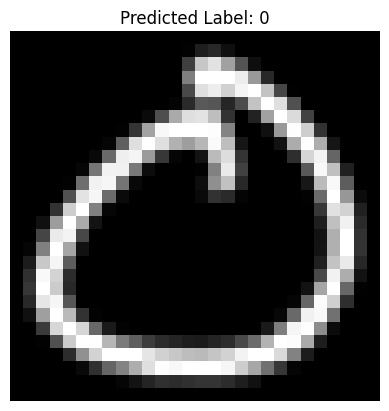

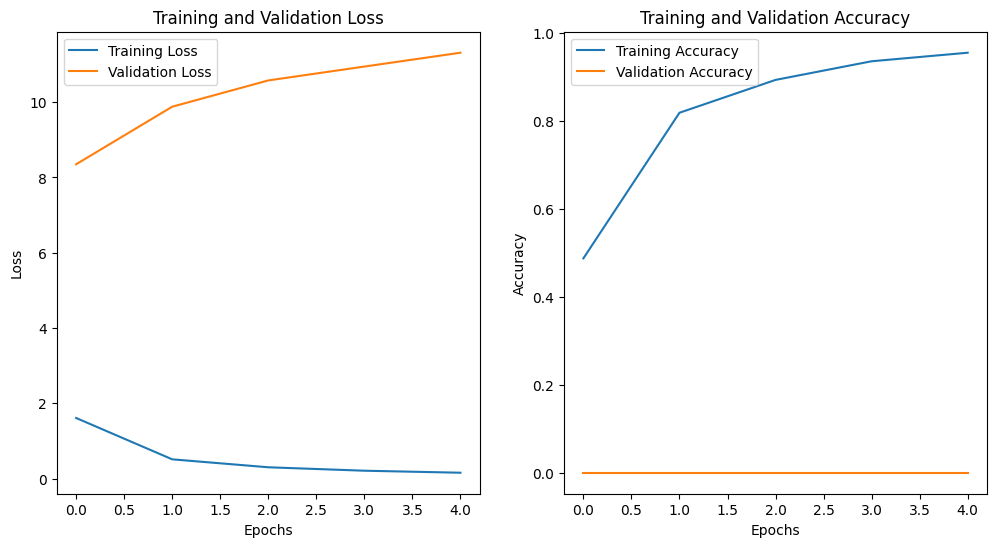

In [9]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display first test image and predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_labels[0]}")
plt.axis("off")
plt.show()

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
